In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df=df.iloc[:,[0,1]]
df.columns=['labels','text']
df.head(10)

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of Both labels ')

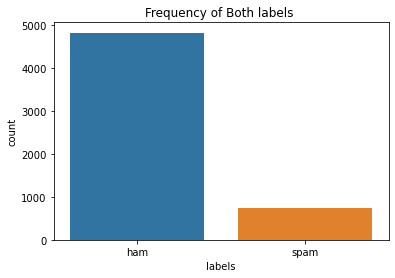

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.labels)
plt.title('Frequency of Both labels ')

In [6]:
df[df['labels']=='ham'].value_counts()

labels  text                                                                                          
ham     Sorry, I'll call later                                                                            30
        I cant pick the phone right now. Pls send a message                                               12
        Ok...                                                                                             10
        Okie                                                                                               4
        Ok.                                                                                                4
                                                                                                          ..
        Pls call me da. What happen.                                                                       1
        Pls ask macho how much is budget for bb bold 2 is cos i saw a new one for  &lt;#&gt;  dollars.     1
        Pls accept me for

In [7]:
df[df['labels']=='spam'].value_counts()

labels  text                                                                                                                                                                
spam    Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!                   4
        Loan for any purpose å£500 - å£75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'    3
        Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.                                                              3
        I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg rcvd. HG/Suite342/2Lands/Row/W1J6HL LDN. 18 years or over.          3
        HMV BONUS SPECIAL 500 pounds of genuine HMV vouchers to be won. Just answer 4 easy questions. Play Now! Sen

In [8]:
X=df['text']
Y=df.labels
X,Y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                Will Ì_ b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: text, Length: 5572, dtype: object,
 0        ham
 1        ham
 2       spam
 3        ham
 4        ham
         ... 
 5567    spam
 5568     ham
 5569     ham
 5570     ham
 5571     ham
 Name: labels, Length: 5572, dtype: object)

In [9]:
# Encode the labels
#It is not a case of MultiClass classification
# we have to perform Binary classification
# So , LabelEncoder is a better option
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
# I have fixed the number_of_columns=1
Y=Y.reshape(-1,1)
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [11]:
from nltk.corpus import stopwords   #remove stopwords
from nltk.stem.porter import PorterStemmer   #stemming
import re
#Different models for converting text to vector
from sklearn.feature_extraction.text import CountVectorizer #BOW
from sklearn.feature_extraction.text import TfidfVectorizer    # Tf-idf
from gensim.models import Word2Vec   # word2vec method


In [12]:
port_stem=PorterStemmer()
corpus=[]
for i in range(len(df['text'])):
    text_1=re.sub('[^a-zA-Z]'," ",df['text'][i])
    text_1=text_1.lower()
    text_1=text_1.split()
    text_1=[port_stem.stem(word) for word in text_1 if word not in stopwords.words('english')]
    text_1=' '.join(text_1)
    corpus.append(text_1)

In [13]:
len(corpus),len(Y)

(5572, 5572)

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(corpus,Y,test_size=0.2,random_state=2)

In [15]:
len(xtrain),len(ytrain),len(xval),len(yval)

(4457, 4457, 1115, 1115)

In [16]:
%%time
documents=[text.split() for text in xtrain]

CPU times: user 5.48 ms, sys: 3.94 ms, total: 9.41 ms
Wall time: 9.72 ms


In [18]:
len(documents)

4457

In [19]:
import gensim
w2v_model = gensim.models.Word2Vec(size=300, 
                                            window=3, 
                                            min_count=5, 
                                            workers=8)
# min_count (int, optional) – Ignores all words with total frequency lower than this.
# workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# vector_size (int, optional) – Dimensionality of the word vectors.

In [20]:
w2v_model

In [21]:
w2v_model.build_vocab(documents)
# Build vocabulary from a dictionary of word frequencies.

In [22]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 1339


In [24]:
%%time
w2v_model.train(documents,total_examples=len(documents),epochs=32)

CPU times: user 3.75 s, sys: 132 ms, total: 3.88 s
Wall time: 2.26 s


(928638, 1279456)

In [25]:
w2v_model.most_similar("answer")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('question', 0.9224188923835754),
 ('coin', 0.8787317276000977),
 ('style', 0.877980649471283),
 ('rd', 0.8706529140472412),
 ('hand', 0.8631642460823059),
 ('break', 0.8613015413284302),
 ('transfer', 0.8492653369903564),
 ('marri', 0.8377968668937683),
 ('area', 0.8333717584609985),
 ('balanc', 0.8317174315452576)]

In [26]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [27]:
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 5538


In [28]:
tokenizer

In [29]:
%%time
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(tokenizer.texts_to_sequences(xtrain), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(xval), maxlen=300)

CPU times: user 162 ms, sys: 2.23 ms, total: 164 ms
Wall time: 175 ms


In [30]:
x_train

array([[   0,    0,    0, ...,  997,   15,  404],
       [   0,    0,    0, ...,  122, 1600,   62],
       [   0,    0,    0, ..., 2000,   88,  998],
       ...,
       [   0,    0,    0, ...,  354,    6,    8],
       [   0,    0,    0, ...,    0,    0,  903],
       [   0,    0,    0, ...,    3, 1664, 2862]], dtype=int32)

In [31]:
len(x_train),len(ytrain),len(x_test),len(yval)

(4457, 4457, 1115, 1115)

In [32]:
# Build Embedding Layer
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix)
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5538, 300)


In [33]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00570029, -0.0808743 ,  0.17318666, ..., -0.18286459,
         0.00824233, -0.12727548],
       [-0.27824911, -0.31369361,  0.09875765, ..., -0.0213587 ,
         0.14496598, -0.31701085],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
from keras.layers import Activation, Dense, Dropout, Embedding
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [35]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# Build The model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          1661400   
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,754,905
Trainable params: 93,505
Non-trainable params: 1,661,400
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [37]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [38]:
%%time
history = model.fit(x_train, ytrain,
                    batch_size=32,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
126/126 [==============================] - 208s 2s/step - loss: 0.2262 - accuracy: 0.9086 - val_loss: 0.0694 - val_accuracy: 0.9843
Epoch 2/8
126/126 [==============================] - 202s 2s/step - loss: 0.0663 - accuracy: 0.9812 - val_loss: 0.0701 - val_accuracy: 0.9865
Epoch 3/8
126/126 [==============================] - 199s 2s/step - loss: 0.0503 - accuracy: 0.9853 - val_loss: 0.0679 - val_accuracy: 0.9843
Epoch 4/8
126/126 [==============================] - 199s 2s/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.0646 - val_accuracy: 0.9865
Epoch 5/8
126/126 [==============================] - 198s 2s/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0824 - val_accuracy: 0.9821
Epoch 6/8
126/126 [==============================] - 199s 2s/step - loss: 0.0398 - accuracy: 0.9891 - val_loss: 0.0658 - val_accuracy: 0.9865
Epoch 7/8
126/126 [==============================] - 199s 2s/step - loss: 0.0328 - accuracy: 0.9914 - val_loss: 0.0665 - val_accuracy: 0.9843
Epoch 

In [39]:
%%time
score = model.evaluate(x_test, yval, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

35/35 [==============================] - 3s 86ms/step - loss: 0.0727 - accuracy: 0.9821

ACCURACY: 0.9820627570152283
LOSS: 0.07272802293300629
CPU times: user 3.06 s, sys: 28 ms, total: 3.09 s
Wall time: 3.04 s


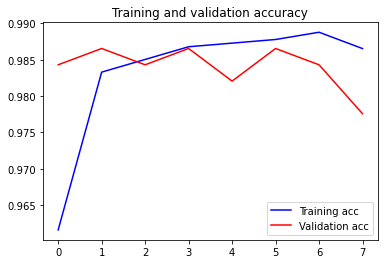

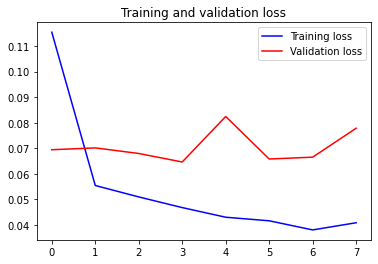

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()